# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [4]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [5]:
transactions.isnull().sum

<bound method DataFrame.sum of          type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0       False   False     False          False           False     False   
1       False   False     False          False           False     False   
2       False   False     False          False           False     False   
3       False   False     False          False           False     False   
4       False   False     False          False           False     False   
...       ...     ...       ...            ...             ...       ...   
999995  False   False     False          False           False     False   
999996  False   False     False          False           False     False   
999997  False   False     False          False           False     False   
999998  False   False     False          False           False     False   
999999  False   False     False          False           False     False   

        oldbalanceDest  newbalanceDest  isFraud  isFlagg

In [6]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [7]:
transactions.duplicated().sum()

np.int64(0)

In [8]:
# Fraud class distribution
transactions['isFraud'].value_counts(normalize=True)



isFraud
0    0.998703
1    0.001297
Name: proportion, dtype: float64

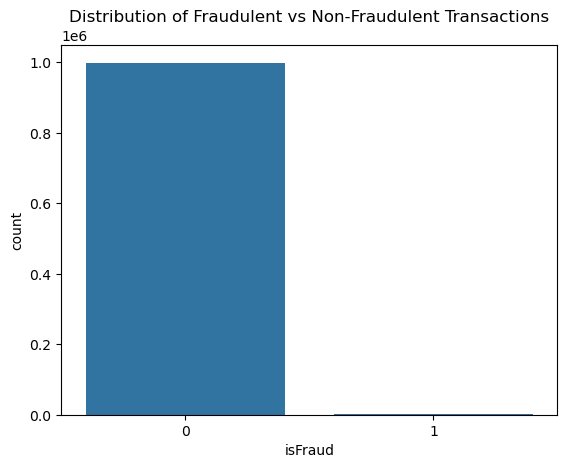

In [9]:
sns.countplot(x='isFraud', data=transactions)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


<Axes: xlabel='type', ylabel='amount'>

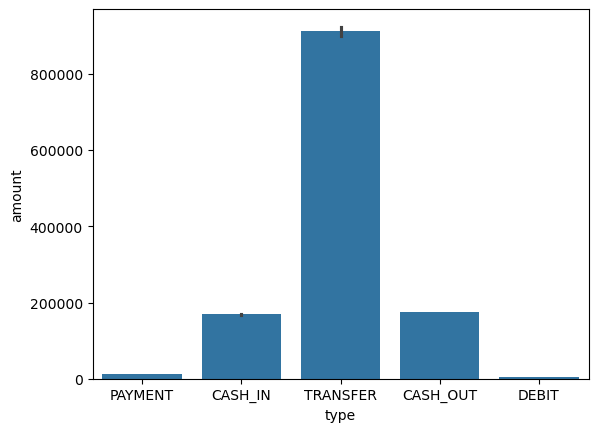

In [10]:
sns.barplot(x = transactions["type"], y = transactions["amount"])

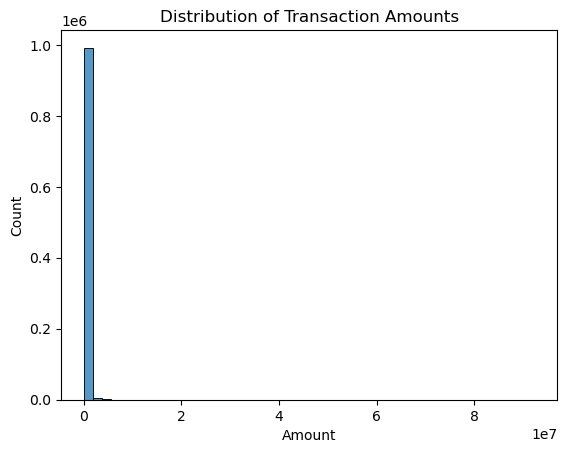

In [11]:
sns.histplot(transactions['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


In [20]:
transactions[['amount', 'oldbalanceOrg', 'newbalanceOrig']].skew()


amount            33.297530
oldbalanceOrg      5.253257
newbalanceOrig     5.181797
dtype: float64

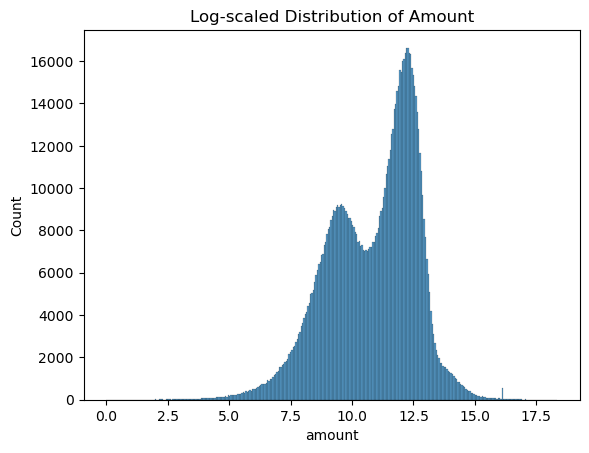

In [21]:
sns.histplot(np.log1p(transactions['amount']))
plt.title('Log-scaled Distribution of Amount')
plt.show()


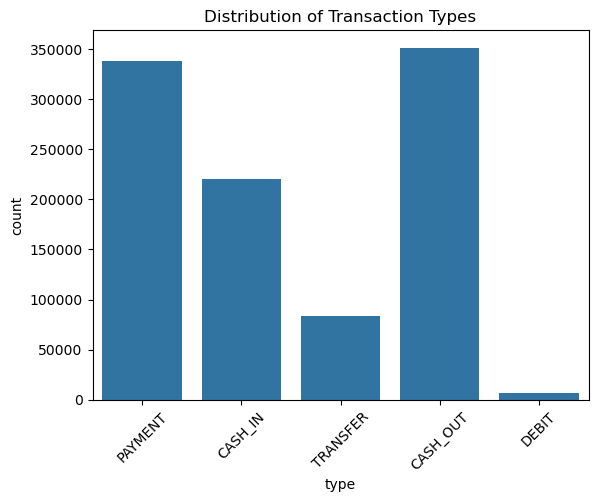

In [15]:
# Count of each transaction type
transactions['type'].value_counts()
sns.countplot(x='type', data=transactions)
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()






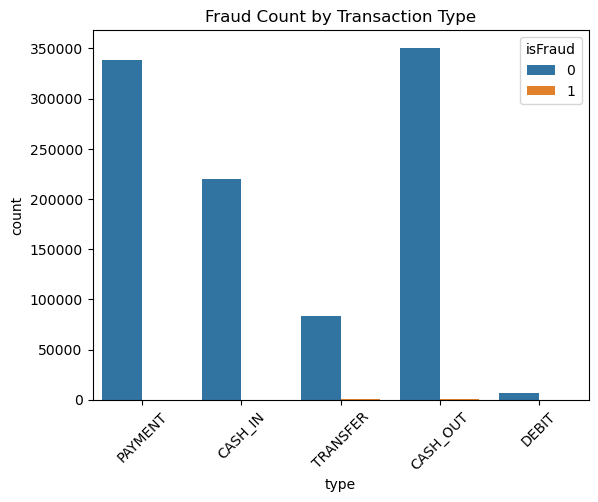

In [16]:
# Fraud by transaction type
sns.countplot(x='type', hue='isFraud', data=transactions)
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)
plt.show()


In [17]:
pd.crosstab(transactions['isFlaggedFraud'], transactions['isFraud'], normalize='index')


isFraud,0,1
isFlaggedFraud,,
0,0.998704,0.001296
1,0.000000,1.000000


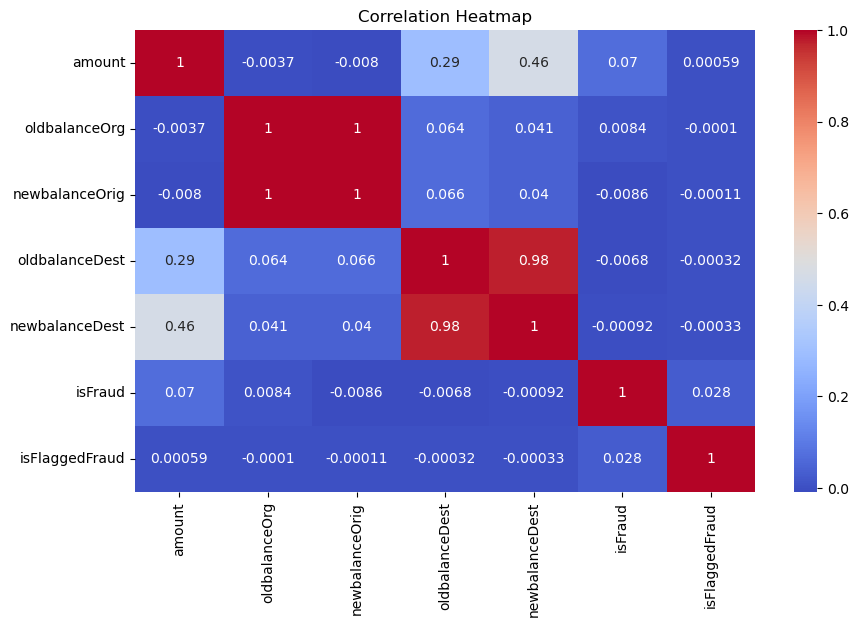

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(transactions.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

When analyzing the numeric features in the dataset columns amount, oldbalanceOrg, and newbalanceOrig I noticed that their distributions are right-skewed. This means most of the values are small, but there are a few transactions with very large amounts. I saw this from the summary statistics using transactions.describe(). The median amount showed around $74,000 an the maximum amoth was over $92 million.
This was confirmed with the histogram of the amount column, which showed most transactions clustered at lower amounts with a few very high ones stretching out the distribution.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here